# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
% matplotlib notebook


In [2]:
data = pd.read_csv("../Assets/Project2/billboard.csv")
print 'The billboard data set contains: %r rows and %r columns' % (data.shape[0],data.shape[1])

The billboard data set contains: 317 rows and 83 columns


In [3]:
data.dtypes.head(10)

year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
x1st.week            int64
x2nd.week          float64
x3rd.week          float64
dtype: object

The output shows us that we're working with a set of 317 records and 83 columns. Several of the column variables are encoded as numeric data types (int64 and float64) but a few of them are encoded as "object". 

In order to get a better sense of the data, let's print out the head of the data.

In [4]:
print data.head(5)

   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

  genre date.entered date.peaked  x1st.week  x2nd.week  x3rd.week     ...      \
0  Rock   2000-09-23  2000-11-18         78       63.0       49.0     ...       
1  Rock   2000-02-12  2000-04-08         15        8.0        6.0     ...       
2  Rock   1999-10-23  2000-01-29         71       48.0       43.0     ...       
3  Rock   2000-08-12  2000-09-16         41       23.0       18.0     ...       
4  Rock   2000-08-05  2000-10-14         57       47.0       45.0     ...       

   x67th.week  x68th.week  x69th.week  x70th.week 

After looking at the data, one can see that this data gives information on several music songs, their artist, release date, length of track, genre, date it entered the billboard, date it peaked and the position of the track in the next 76 weeks.

Since we are going to work with this data set and do some statistical analysis, it's important to see what kind of statistics are readily available.

In [5]:
data.describe()

,year,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
count,317.0,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2000.0,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,74.000000,63.000000,53.000000,44.750000,38.750000,33.750000,30.000000,27.000000,26.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2000.0,81.000000,73.000000,66.000000,61.000000,57.000000,51.500000,47.000000,45.500000,42.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.0,91.000000,84.000000,79.000000,76.000000,73.250000,72.250000,67.000000,67.000000,67.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2000.0,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since data.describe() does not show categorical data, it's important to show statistics on the categorical data.

In [6]:
categorical = data.dtypes[data.dtypes == "object"].index
print(categorical)

data[categorical].describe()

Index([u'artist.inverted', u'track', u'time', u'genre', u'date.entered',
       u'date.peaked'],
      dtype='object')


,artist.inverted,track,time,genre,date.entered,date.peaked
count,317,317,317,317,317,317
unique,228,316,126,10,68,53
top,Jay-Z,Where I Wanna Be,3:50,Rock,2000-01-29,2000-12-02
freq,5,2,9,137,11,17


##### Write a brief description of your data, and any interesting observations you've made thus far. 

The data collected shows the billboard ranking of several songs in the year 200 and the length by week and position that they stayed on the ranking. Initial exploration of our data we find that no song stayed longer in the bill board than week 65, so when we get to clean our data we can delete some week columns. Also there are some NaN values in the weeks column which suggest that after the last numerical entry the song left the billboard so there are no values for it. 

## Step 2: Clean your data.

#### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. Explain your rationale for the way you choose to "impute" the missing data.

Since I would like to see the amount of weeks the song stayed on the chart I will create a column for it named Weeks on Billboard.

In [7]:

weekdata=data.iloc[:,7:]
weeks=[]
for i in range(len(weekdata)):
    weeks.append(0)
    for a in range(0,76):
        if weekdata.iloc[i,a]>= 1:
            weeks[i] += 1
data['Weeks on Billboard'] = weeks


Another column that I want to add is the highest rank the song achieved, this column will be named Top Rank.

In [8]:
TopRank = []

for i in range(len(weekdata)):
    TopRank.append(min(weekdata.iloc[i,:]))

data['Top Billboard Rank'] = TopRank


##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [9]:
data =pd.melt(data, id_vars=['year','artist.inverted','track','time','genre','date.entered','date.peaked','Weeks on Billboard','Top Billboard Rank'], var_name='Week', value_name='Ranking', col_level=None)


##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. Explain your rationale for the way you choose to "impute" the missing data.

In [10]:
data = data.dropna()
data['Week'] = data['Week'].apply(lambda x: x.lstrip('x').rstrip('rdndthst.week'))
data["Week"] = data['Week'].apply(lambda x: int(x))


In [11]:
data

,year,artist.inverted,track,time,genre,date.entered,date.peaked,Weeks on Billboard,Top Billboard Rank,Week,Ranking
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,28,1.0,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,26,1.0,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,33,1.0,1,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,24,1.0,1,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,21,1.0,1,57.0
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,24,1.0,1,59.0
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,32,1.0,1,83.0
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,20,1.0,1,63.0
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,26,1.0,1,77.0
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,55,1.0,1,81.0


In [12]:
data.to_csv('../Assets/Project2/finaldata.csv')
data.dtypes

year                    int64
artist.inverted        object
track                  object
time                   object
genre                  object
date.entered           object
date.peaked            object
Weeks on Billboard      int64
Top Billboard Rank    float64
Week                    int64
Ranking               float64
dtype: object

Data Dictionary

## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

The first visualization I want to make required cleaning the data in different way. The dataset does not have all the weekly information but it does contains a Top Billboard Rank that was created by going through the week data. This visualization would allow me to see what genres are the top performers.

<IPython.core.display.Javascript object>


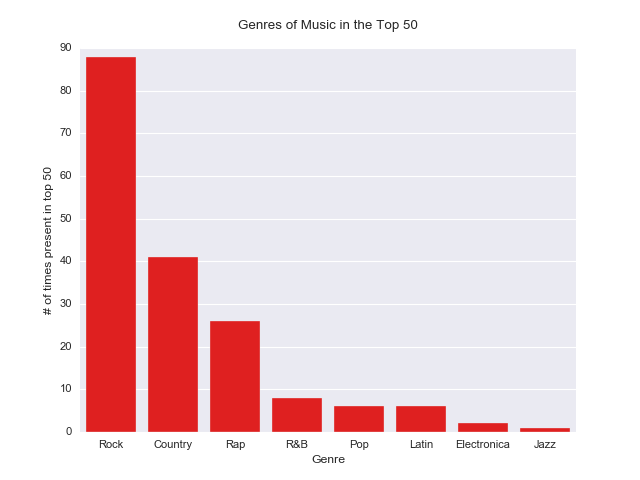

In [13]:
plt.figure(1)
import seaborn as sns
datasimple = pd.read_csv("../Assets/Project2/simpledata.csv")
top50 = datasimple['genre'].where(datasimple['Top Billboard Rank']<= 50).value_counts()
b = sns.barplot(top50.index, top50, color='red');
sns.set_style("white")
sns.plt.title("Genres of Music in the Top 50\n")
sns.plt.ylabel("# of times present in top 50")
sns.plt.xlabel("Genre")

The second visualization is a scatter plot of how all the songs performed over the weeks. To take it step further, I decided to give the graph a third dimesion of the genres. Since I already knew which genres are the top performers, I was able to categorize them.

<IPython.core.display.Javascript object>


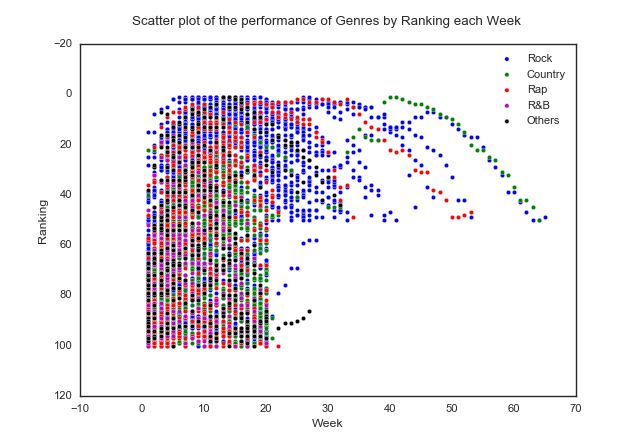

In [14]:
plt.figure(2)
data['Hello'] = np.select([data.genre == 'Rock', data.genre == 'Country', data.genre == 'Rap', data.genre == 'R&B'],
                         ['Rock','Country','Rap','R&B'],'Others')
for color, label in zip('bgrmk', ['Rock','Country','Rap','R&B','Others']):
    subset = data[data.Hello == label]
    plt.scatter(subset.Week, subset.Ranking, s=15, c=color, label=str(label))
plt.title("Scatter plot of the performance of Genres by Ranking each Week \n")
plt.xlabel('Week')
plt.legend()
plt.ylabel('Ranking')
plt.gca().invert_yaxis()

The last visualization shows the relationship between the Top Rank that a song achieved vs the amount of weeks it stayed on the billboard.

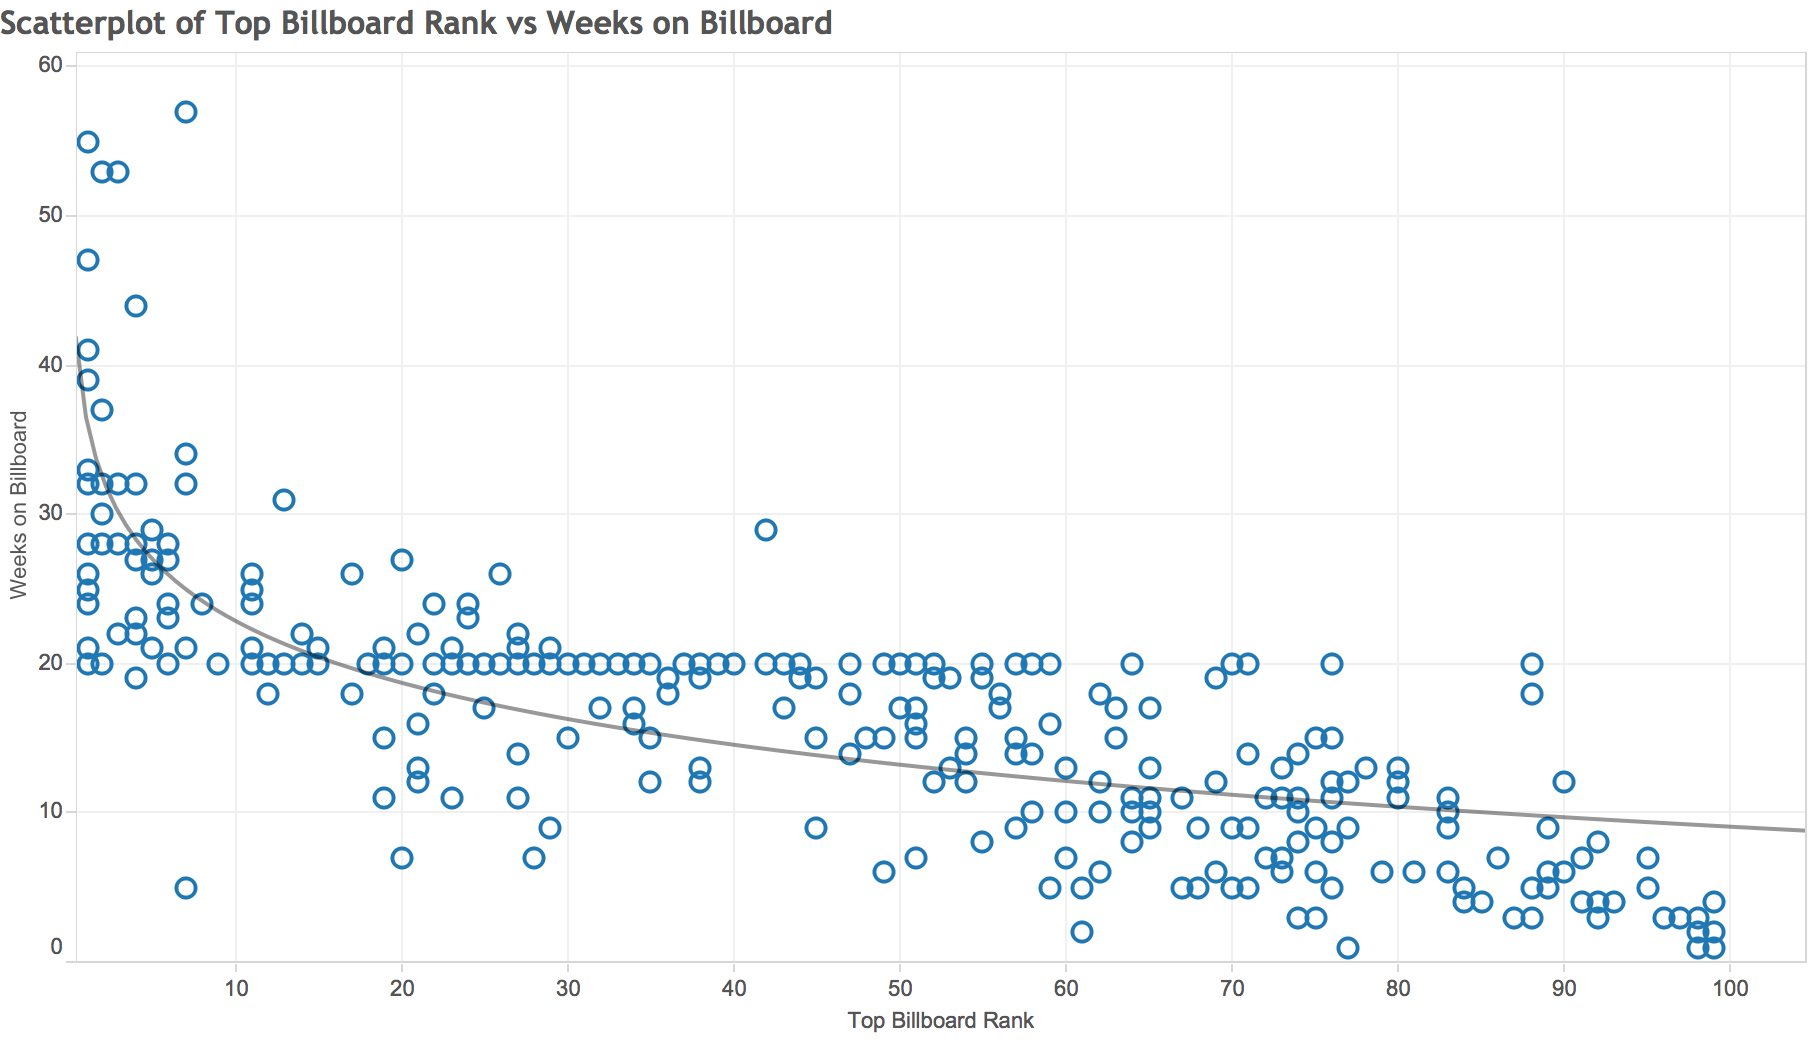

In [15]:
from IPython.display import Image
Image(filename="../Assets/Project2/scatterplot.png")

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

After an innitial exploration of the data, I was able to find several issues with the data set. The labeling of the genres in the data set is confusing. When the genres of the Billboard were charted I noticed that the Rock Genre was unusually high. Upon explorating the data set I found that many of those songs inside Rock could be placed in different genres. The second problem with the dataset is that by looking at the scatter plot of the performance of genres by ranking each week there is a big chunk of data that is either missing or was cut in purpose. Further examination of the data set I was able to plot the the top rank that a song achieved in the biilboard by the amount of weeks it stayed on the billboar. Looking at these two graphs it is clear that something is happening at week 20 that if the song is below the 50th rank it automatically gets taken out of the chart. The resoning behind this I believe is to allow for new songs to populate the lower ranks. But I think that this is not good as this can also take out songs that have a slow climb rate. The second scatter clearly shows that there are many songs that were taken out of the chart even though they had good performance. To have a better look at the data I propose to find a way to remove this filter place upon the billboard to trully look at the performance of the songs. 

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

My approach to the problem would be the following. First, it would be good to categorize better those rock songs into more representative categories. After this look at each individual song and do a regression on them. After doing this for all the songs, it would be a good idea to look at the average of these fitted lines. Then I would apply this equation to those songs who were dropped from the chart at week 20. Then I would make the 3 charts again and look at the differences. One could do some statistical analysis to find if the two populations would be statistically different or not.

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 

What it means to have clean data
The first and one of the most important steps in data processing is to verify the dataset values are correct and that they are in the correct format to be processed. One of the first initial approaches is to create a layout of the data file. This layout contains the variable name, description, variable type and the valid values. Having the valid values is important as it allows you to have a solid understanding of what kind of values to expect. When cleaning datasets, one will find many different types of problems in the data set. Having duplicate data is one of the most common problems found, this can be attributed to improper data merging or user error at the time of collection. When your data does not fall into the proper range can be a big problem because it makes you question the validity of the source. Inaccurate data is another problem often found in datasets and it comes from bad data merging. The problem with inaccurate data is that the value might seem correct, but in reality it is not. For example, when you have city and state a bad data merge can confuse cities with the same name but in different states. Another bad example of having dirty data is when you have junk records. For example, there are users that avoid sharing their email addresses and use a fake address(i.e. ihateemails@gmail.com). Having this types of errors in your data will pollute the data and if they are going to be used in an email campaign you might have a high bounce rate due to this problem. Another problem found in dirty data is that is often not formatted the right way. One of the biggest examples is the way dates are collected in different parts of the world. In the USA dates are collected in the MM/DD/YYYY format while other part of the world collect in the DD/MM/YYYY format. This can create problems with the data set and should be addressed before merging the datasets. The last problem found on dirty data is when you have missing values. Missing values is something that you found across the vast majority of data sets and what to do with this missing values depends on what it is being done with the data. There are many approaches to cleaning missing values. All these approaches have good things and bad things, but what it is really important is to understand perfectly the data so that when you are populating the dataset, one does not input values that will make the data misleading. There are many different techniques to identify missing data or data values that do not fall within the acceptable limits. What it means to have clean data is to have a data set where all the problems mentioned above had been dealt with.